# Experiment 5: Transfer Learning from Underwater to Conveyor Belt Environment
- **Objective**: Test model's transfer learning from underwater training to conveyor belt testing.
- **Training & Fine-Tuning**: Initially Underwater, then fine-tuned with Conveyor Belt Dataset.
- **Validation**: Conveyor Belt Dataset subset post-fine-tuning.
- **Confusion Matrix Analysis**: Assess transfer learning from underwater to conveyor belt setting.
- **Testing**: Conveyor Belt Dataset for final assessment.
- 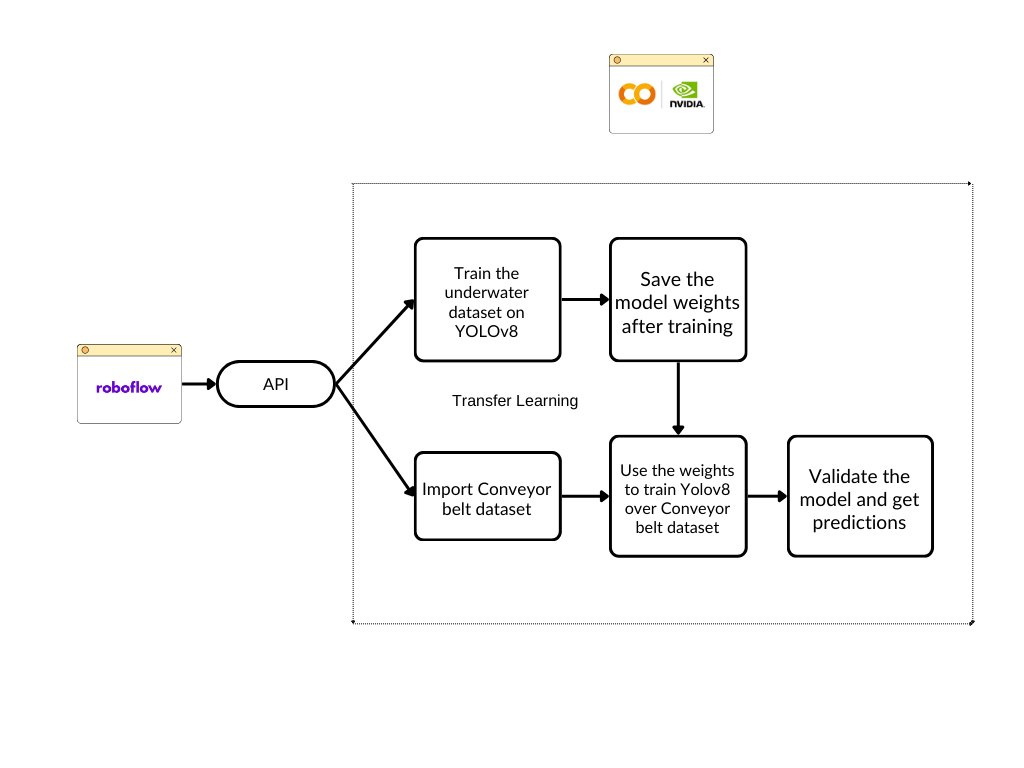

##Initializing

In [ ]:
# This command checks the status and specification of the NVIDIA GPU in the system.
!nvidia-smi

- `!`: This symbol is used in Jupyter notebooks (like Google Colab) to execute shell commands.
- `nvidia-smi`: NVIDIA System Management Interface, a command-line utility, provides information about GPU properties and usage. This includes details like the GPU model, its current usage, GPU memory, driver version, and the processes currently utilizing the GPU. It's particularly useful for monitoring and managing the GPU's performance during deep learning and other GPU-intensive tasks.


In [ ]:
# Import the OS module for interacting with the operating system
import os

# Get the current working directory and store it in the variable HOME
HOME = os.getcwd()

# Print the path stored in the HOME variable
print(HOME)

- `import os`: This line imports the OS module, which provides a way of using operating system dependent functionality.
- `os.getcwd()`: This function call gets the current working directory, i.e., the folder in which the Python script is operating.
- `HOME = os.getcwd()`: Here, the current working directory is stored in a variable named `HOME` for later use.
- `print(HOME)`: This line prints the path stored in `HOME`. It's useful for confirming the current directory context of your Python script, especially in environments like Jupyter notebooks where the working directory might not be immediately clear.


In [ ]:
# Install a specific version of the 'ultralytics' package using pip
!pip install ultralytics==8.0.20

# Import the 'display' module from 'IPython' and clear the output
from IPython import display
display.clear_output()

# Import and perform checks with the ultralytics package
import ultralytics
ultralytics.checks()

- `!`: This symbol allows shell commands to be run in Jupyter notebooks (like Google Colab).
- `pip install ultralytics==8.0.20`: This command uses pip, the package installer for Python, to install a specific version (8.0.20) of the 'ultralytics' package. The version number is specified to ensure compatibility and consistency in the environment.
- `from IPython import display`: This line imports the 'display' module from the 'IPython' library. 'IPython' provides more advanced interactive features than standard Python.
- `display.clear_output()`: This function call clears the output of the current cell in a Jupyter notebook. It's useful for keeping the notebook tidy, especially after running installation commands that produce a lot of text.
- `import ultralytics`: This line imports the 'ultralytics' package, which is assumed to offer functionalities related to machine learning or computer vision tasks.
- `ultralytics.checks()`: This function call presumably runs a series of diagnostic or setup checks associated with the 'ultralytics' package. This might include verifying installation, checking for necessary dependencies, or validating the environment setup.


In [ ]:
# Import the YOLO class from the ultralytics package
from ultralytics import YOLO

# Import display and Image functions from the IPython.display module
from IPython.display import display, Image

- `from ultralytics import YOLO`: This line imports the YOLO (You Only Look Once) class from the 'ultralytics' package. YOLO is a popular object detection algorithm known for its efficiency and accuracy. The 'ultralytics' implementation of YOLO is likely optimized for specific use cases or performance characteristics.
- `from IPython.display import display, Image`: This line imports two functions, `display` and `Image`, from the `IPython.display` module.
- `display`: This function is used to output (or "display") Python objects in rich formats (like images, videos, or interactive widgets) within Jupyter notebooks.
- `Image`: This is a class used to display images in Jupyter notebooks. It can handle images sourced from a file, a URL, or raw image data in various formats.

**Fetching the Dataset**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ebMjZPLXM8pNSTq3989b")
project = rf.workspace("pratishthit-choudhary").project("fish-conveyor-segmentation")
dataset = project.version(7).download("yolov8")


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model={HOME}/best.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

- `%cd {HOME}`: This Jupyter notebook magic command is used to change the current working directory. `{HOME}` is a variable that contains the path to the home directory. The command ensures that the working directory is set to `HOME` before executing further commands.
- `!yolo`: This command runs the YOLO (You Only Look Once) object detection model. The `!` indicates that it is a shell command, which is used to execute programs available in the system environment from within the Jupyter notebook.
- `task=detect`: Specifies the task for the YOLO model, which in this case is object detection.
- `mode=train`: Sets the mode of operation to 'train', meaning that the model will be trained on the specified dataset.
- `model=yolov8l-seg.pt`: Points to the specific YOLO model file to be used for training. In this case, it's 'yolov8l-seg.pt', which is a version of YOLOv8 designed for segmentation tasks.
- `data={dataset.location}/data.yaml`: Specifies the path to the dataset configuration file. `{dataset.location}` is a variable that contains the location of the dataset, and `data.yaml` is a YAML file that includes the dataset details like paths to training and validation data, class names, etc.
- `epochs=50`: Sets the number of training cycles (epochs) through the dataset. Here, the model will go through the dataset 50 times.
- `imgsz=640`: Specifies the size of the images for training, set to 640 pixels.
- `plots=True`: Enables the generation of plots during the training process. These plots can provide visual insights into the training progress, such as loss and accuracy metrics over time.

**Note:**
Ensure that the YOLO model file 'yolov8l-seg.pt' and the dataset configuration file 'data.yaml' are correctly placed and accessible in the specified locations. Also, the `yolo` command should be properly set up in your environment to execute this training process.


In [ ]:
!ls {HOME}/runs/detect/train/

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=1000)

- `!ls`: This is a shell command to list the contents of a directory.
- `{HOME}/runs/detect/train/`: The directory path where the training output of the YOLO model is stored. The `{HOME}` variable is replaced with the path to the home directory as defined earlier in the code. The rest of the path (`/runs/detect/train/`) is presumably the default or specified directory structure used by YOLO for storing training outputs.
- This command will display the files and directories inside the specified path, which can include model weights, logs, images, and other artifacts generated during the training process.

**Note:**
The `!ls` command is used for Unix/Linux based systems. If you're using a different operating system (like Windows), the command might differ (like `!dir` in Windows).


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

- `Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)`: This line creates an instance of the `Image` class to display an image.
  - `filename=f'{HOME}/runs/segment/train/results.png'`: Specifies the path to the results image file. The path is constructed using an f-string that includes the `HOME` variable and the relative path to the 'results.png' image in the training segment.
  - `width=600`: Sets the width of the image to be displayed to 600 pixels.
- This command is used to display the 'results.png' image, which likely contains visual representations of the training results, such as loss graphs, accuracy metrics, or other relevant visualizations from the segmentation model's training process.


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/best.pt conf=0.25 source={dataset.location}/test/images save=True

##**Download Runtime**

In [ ]:
import zipfile

def download_folder(folder_path, zip_file_name):
  """Downloads a folder from runtime in Colab.

  Args:
    folder_path: The path to the folder to download.
    zip_file_name: The name of the ZIP file to download.
  """

  with zipfile.ZipFile(zip_file_name, 'w') as zip_file:
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        zip_file.write(os.path.join(root, file))

  from google.colab import files
  files.download(zip_file_name)

# Example usage:

folder_path = '/content/runs'
zip_file_name = 'TransferLearningPratish.zip'

download_folder(folder_path, zip_file_name)


**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

- `import glob`: This line imports the `glob` module, which is used to find all the pathnames matching a specified pattern according to the rules used by the Unix shell. It's useful for file searching.
- `from IPython.display import Image, display`: Imports the `Image` class and `display` function from the `IPython.display` module for displaying images in Jupyter notebooks.
- `glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]`:
  - `glob.glob()`: This function retrieves a list of file paths matching the specified pattern.
  - `f'{HOME}/runs/detect/predict3/*.jpg'`: An f-string that creates a file path pattern, looking for all `.jpg` files in the specified directory. `{HOME}` is replaced with the path stored in the `HOME` variable.
  - `[:3]`: This slices the list to include only the first three images.
- `for image_path in ...`: This for loop iterates over the first three image paths returned by `glob`.
  - `display(Image(filename=image_path, width=600))`: Displays each image in the notebook. `Image(filename=image_path, width=600)` creates an `Image` object for each file path, and `display()` outputs it in the notebook.
  - `print("\n")`: Prints a newline after each image for better separation and readability in the notebook.

**Note:**
This code snippet is typically used for visually inspecting a few sample prediction results. It helps in quickly assessing the model's performance on the test images.

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

- `model = project.version(dataset.version).model`: This line of code retrieves the model from a specific version of the dataset, assuming `project` and `dataset` are predefined objects related to your dataset and project setup, typically from a service like Roboflow.
- `import os, random`: Imports the `os` and `random` modules. `os` is used for interacting with the operating system, and `random` for generating random numbers.
- `test_set_loc = dataset.location + "/test/images/"`: Constructs the path to the test images directory.
- `random.choice(os.listdir(test_set_loc))`: Randomly selects an image file from the test images directory.
- `print("running inference on " + random_test_image)`: Prints the name of the selected image file.
- `pred = model.predict(...)`: Calls the `predict` method on the `model` object. This method performs object detection inference on the specified image.
  - `test_set_loc + random_test_image`: Specifies the full path of the image on which to run inference.
  - `confidence=40, overlap=30`: Sets the confidence threshold to 40% and the overlap threshold to 30% for the predictions.
  - `.json()`: Converts the prediction result into a JSON format.
- `pred`: This variable now contains the JSON-formatted prediction results.


Note:
The exact functionality of `model.predict` and the structure of `pred` will depend on the specifics of the model and the framework or service you're using (like Roboflow).

✅ End of Experiment 5

---
